In [26]:
#One-Dimnensional Linear Regression

#Useful for finding the relationship between (linearly related) data, Ax=b
#The psuedo-inverse of the SVD of the data (A) gives the least-squares solution (x)
    #The least-squares solution minimizes ||Ax-b||_2
    #If A = US(V^T), then the pseudoinverse of A is V(S^-1)(U^T)
    #So, x = V(S^-1)(U^T)b
#The below example is one-dimensional (i.e. A is a column vector), but the process works the same for higher dimensions

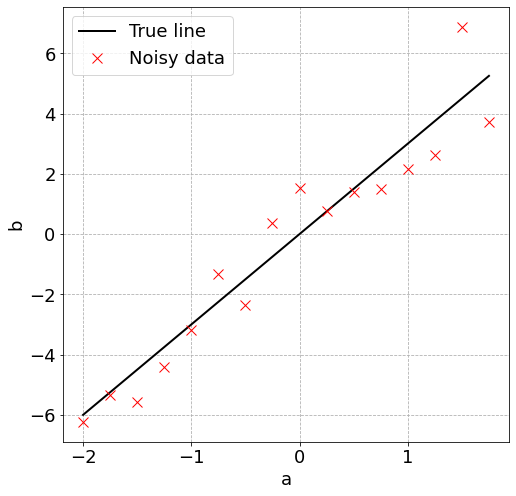

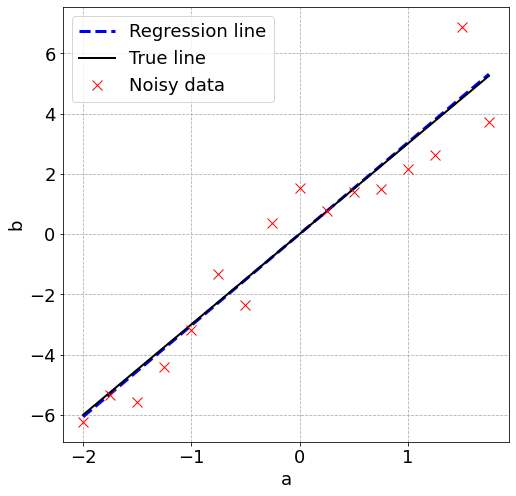

In [2]:
#import neccesary libraries
import matplotlib.pyplot as plt
import numpy as np
#Set default graph parameters
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

#Params
aErr = 1
numPoints = 16

#Create example data
x = 3 # True slope
a = np.arange(-2,2, 4/numPoints) #create array of evenly spaced values
a = a.reshape(-1, 1) #Tranpose array into column vector
b = x*a + aErr*np.random.randn(*a.shape) # Add noise

#Plot Data
plt.plot(a, a*x, color='k', linewidth=2, label='True line') # True relationship
plt.plot(a, b, 'x', color='r', markersize = 10, label='Noisy data') # Noisy measurements

plt.xlabel('a')
plt.ylabel('b')
plt.legend()
plt.grid(linestyle='--')
plt.show()

#Use SVD to compute least-square fit
U, S, VT = np.linalg.svd(a,full_matrices=False)
xtilde = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b # Least-squares fit

#Plot Data and regression
plt.plot(a, xtilde * a,'--', color='b',linewidth=3, label='Regression line') # Least-Squares line
plt.plot(a, a*x, color='k', linewidth=2, label='True line') # True relationship
plt.plot(a, b, 'x', color='r', markersize = 10, label='Noisy data') # Noisy measurements

plt.xlabel('a')
plt.ylabel('b')
plt.legend()
plt.grid(linestyle='--')
plt.show()

In [3]:
# Three methods of computing regression

xtilde1 = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
xtilde2 = np.linalg.pinv(a) @ b

print(xtilde1 == xtilde2)

# The third method is specific to Matlab:
# xtilde3 = regress(b,a)

[[ True]]


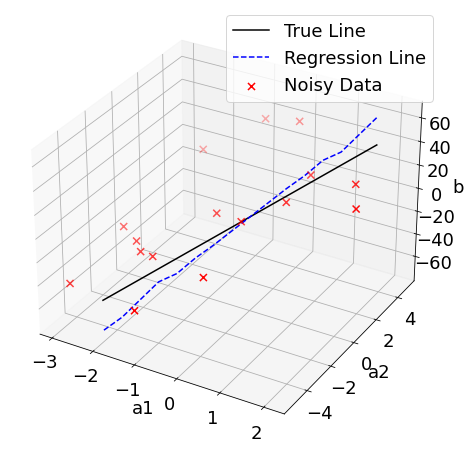

In [5]:
#import neccesary libraries
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

#Params
a1Er = 1
a2Er = 2
numPoints = 16

#Create example Data
x = [[3],[8]] #True relationship

a1 = np.arange(-2,2,(4/numPoints))
a2 = np.arange(-5,5,(10/numPoints))
a1Noisy = a1 + a1Er*np.random.randn(*a1.shape)
a2Noisy = a2 + a2Er*np.random.randn(*a2.shape)

ATrue = np.hstack((a1.reshape(-1,1), a2.reshape(-1,1)))
bTrue = ATrue @ x
bTrue = bTrue.reshape(-1) #Flatten into 1D array (neccessary for plotting)

ANoisy = np.hstack((a1Noisy.reshape(-1,1), a2Noisy.reshape(-1,1)))
bNoisy = ANoisy @ x
bNoisy = bNoisy.reshape(-1) #Flatten into 1D array (neccessary for plotting)

#Use SVD to compute least-square fit
U, S, VT = np.linalg.svd(ATrue, full_matrices=False)
xtilde = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ bNoisy # Least-squares fit
xtilde = xtilde.reshape(-1)

#Set up plot area
fig2 = plt.figure()
plot1 = fig2.add_subplot(111, projection='3d')
#Plot Data
plot1.plot(a1, a2, bTrue, c = 'k', label = 'True Line') #True Relationship
plot1.scatter(a1Noisy, a2Noisy, bNoisy, s = 50, c = 'r', marker = 'x', label = 'Noisy Data') #Noisy Measurements
plot1.plot(a1, a2, ATrue@xtilde, '--', c = 'b', label = 'Regression Line') #Least-Squares line

plot1.set_xlabel('a1')
plot1.set_ylabel('a2')
plot1.set_zlabel('b')
plot1.legend()

plt.show()